In [18]:
import numpy as np
import pandas as pd
import glob
import os
from tqdm.notebook import tqdm
tqdm.pandas()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [19]:
def get_df_info(df):
    print('Dataframe shape: ', df.shape)
    print('-----'*20)
    print('Dataframe info: ')
    print(df.info())
    print('-----'*20)
    print('Dataframe null values count:')
    print(df.isna().sum())
    print('-----'*20)
    print('Dataframe duplicates count:')
    print(df.duplicated().sum())
    print('-----'*20)
    print('Dataframe sample: ')
    display(df.sample(10))


## Data preprocessing

### Read tweets file with sentiments

In [20]:
tweets_df = pd.read_csv('./dataset/Tweets/tweets-sentiment.csv', parse_dates = ['date'])
get_df_info(tweets_df)

Dataframe shape:  (249025, 6)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249025 entries, 0 to 249024
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   stock     249025 non-null  object        
 1   date      249025 non-null  datetime64[ns]
 2   tweets    249025 non-null  object        
 3   negative  249025 non-null  float64       
 4   neutral   249025 non-null  float64       
 5   positive  249025 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 11.4+ MB
None
----------------------------------------------------------------------------------------------------
Dataframe null values count:
stock       0
date        0
tweets      0
negative    0
neutral     0
positive    0
dtype: int64
--------------------------------------------------------------

,stock,date,tweets,negative,neutral,positive
106265,FB,2020-02-22,What happened this week in the #StockMarket? \...,0.012176,0.591801,0.396023
32614,AMZN,2019-11-19,Beautiful short on $AMZN this morning off the ...,0.003749,0.039840,0.956411
182432,MSFT,2020-03-08,Dow 2020 Crash Watch #SPX also #DB #HSBC #AAPL...,0.139979,0.827204,0.032817
191862,NFLX,2019-08-22,#MakeItRAIN: 08/22 FREE #MLB & #NFLX w/ @Sport...,0.003815,0.797021,0.199163
208219,NFLX,2020-05-28,KRIS is the only default probability and fixed...,0.017779,0.887943,0.094278
59202,C,2019-08-01,$AAPL $BYND $AMD $MSFT $BAC $BABA $FB $TSLA $A...,0.014932,0.766760,0.218307
174843,MSFT,2019-10-28,RT TahsinAygun: Investment Result Calculator:\...,0.031685,0.900222,0.068093
110889,FB,2020-05-11,🙌🏽 @jameelajamil appointed as co-chair of $FB ...,0.001593,0.059616,0.938791
105841,FB,2020-02-14,Largest CALL OI increases $CHNG $MCK $BABA $MP...,0.016944,0.786588,0.196468
87716,DIS,2020-03-27,Today's buys were $DIS $ENR $XOM and $DE 😉 #In...,0.001301,0.038509,0.960190


In [21]:
tweets_df.duplicated().sum()

0

### Read stock files with prices

In [22]:
stocks_df = pd.read_csv('./dataset/Stocks/stocks.csv', parse_dates=['date'])
get_df_info(stocks_df)

Dataframe shape:  (3763, 8)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3763 non-null   datetime64[ns]
 1   open       3763 non-null   float64       
 2   high       3763 non-null   float64       
 3   low        3763 non-null   float64       
 4   close      3763 non-null   float64       
 5   adj_close  3763 non-null   float64       
 6   volume     3763 non-null   int64         
 7   stock      3763 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 235.3+ KB
None
----------------------------------------------------------------------------------------------------
Dataframe null values count:
date         0
open         0
high         0
low          0


,date,open,high,low,close,adj_close,volume,stock
2752,2020-07-02,34.700001,34.919998,33.959999,34.119999,34.119999,12300600,LUV
2858,2019-12-05,150.050003,150.320007,149.479996,149.929993,149.106323,17869100,MSFT
3750,2020-06-25,954.270020,985.979980,937.150024,985.979980,985.979980,9254500,TSLA
3594,2019-11-11,343.950012,349.190002,342.000000,345.089996,345.089996,9986700,TSLA
1402,2020-02-13,141.169998,141.899994,140.820007,140.899994,140.899994,7543100,DIS
2163,2020-02-27,1359.140015,1369.400024,1314.239990,1314.949951,1314.949951,3110900,GOOGL
3463,2020-05-05,74.959999,75.080002,72.889999,72.900002,72.490341,12976000,SBUX
2486,2020-06-10,3.540000,3.850000,2.500000,2.520000,2.520000,223181000,HTZ
1471,2020-05-22,117.500000,118.570000,116.830002,118.019997,118.019997,9288200,DIS
2265,2019-07-25,15.620000,16.049999,15.580000,15.910000,15.910000,2979500,HTZ


### Merge tweets and stocks dataframes

In [23]:
df = pd.merge(tweets_df, stocks_df, how='inner', on=['date', 'stock'])
get_df_info(df)

Dataframe shape:  (180360, 12)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180360 entries, 0 to 180359
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   stock      180360 non-null  object        
 1   date       180360 non-null  datetime64[ns]
 2   tweets     180360 non-null  object        
 3   negative   180360 non-null  float64       
 4   neutral    180360 non-null  float64       
 5   positive   180360 non-null  float64       
 6   open       180360 non-null  float64       
 7   high       180360 non-null  float64       
 8   low        180360 non-null  float64       
 9   close      180360 non-null  float64       
 10  adj_close  180360 non-null  float64       
 11  volume     180360 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory us

,stock,date,tweets,negative,neutral,positive,open,high,low,close,adj_close,volume
10482,AAPL,2020-03-31,😎 Most Popular Stocks 😎\n🥇Apple Inc.\n$AAPL » ...,0.011707,0.399001,0.589292,255.600006,262.489990,252.000000,254.289993,253.603500,49250500
163382,SBUX,2020-05-11,"$sbux you got the dip, now can we get the rip 🙏😂",0.179490,0.611400,0.209111,76.620003,77.180000,75.800003,75.870003,75.870003,8998800
168134,TSLA,2019-09-10,Likely a complete hoax. People who have never ...,0.675416,0.267700,0.056884,230.800003,235.539993,228.940002,235.539993,235.539993,4883700
52411,C,2020-06-09,$C Option Order Flow Sentiment is 53.7% Bullis...,0.470509,0.500743,0.028748,59.000000,60.200001,57.650002,59.500000,59.500000,30422900
44018,C,2019-09-25,Elliott management wonder what he saw in $T AT...,0.283532,0.634949,0.081520,67.910004,69.699997,67.870003,69.379997,67.715141,12243000
43220,C,2019-08-28,"$C ""Chelsea Logistics and Infrastructure Holdi...",0.006242,0.797667,0.196091,61.299999,62.799999,61.299999,62.360001,60.863598,12343500
162181,SBUX,2020-04-09,Q2 2020 Earnings Estimate for Starbucks Co. $S...,0.006420,0.897242,0.096338,71.199997,74.260002,70.139999,73.879997,73.464828,19769600
84960,GE,2019-09-17,$GE 3yrs-Wk \nThis old rusty giant not doing b...,0.190363,0.415929,0.393708,9.300000,9.390000,9.250000,9.360000,9.328259,37954000
22062,AMZN,2019-10-21,Get some $AMZN leaps. 😋🏒🥅\n#OptionsTrading #Op...,0.007114,0.316396,0.676490,1769.660034,1785.880005,1765.000000,1785.660034,1785.660034,2130400
131982,MSFT,2020-02-18,😎 Most Popular Stocks 😎\n🥇Apple Inc.\n$AAPL » ...,0.008454,0.310336,0.681209,185.610001,187.699997,185.500000,187.229996,186.201416,27792200


In [24]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180360 entries, 2019-07-15 to 2020-07-08
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   stock      180360 non-null  object 
 1   tweets     180360 non-null  object 
 2   negative   180360 non-null  float64
 3   neutral    180360 non-null  float64
 4   positive   180360 non-null  float64
 5   open       180360 non-null  float64
 6   high       180360 non-null  float64
 7   low        180360 non-null  float64
 8   close      180360 non-null  float64
 9   adj_close  180360 non-null  float64
 10  volume     180360 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 16.5+ MB


In [25]:
df.head()

,stock,tweets,negative,neutral,positive,open,high,low,close,adj_close,volume
date,,,,,,,,,,,
2019-07-15,AAPL,Top 5 Apple Prime Day deals http://dlvr.it/R8...,0.004799,0.442696,0.552505,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,CCI Buy Signals : $AAPL $GDXJ $GH $ZS $JNUG,0.016513,0.858550,0.124938,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,Traders checkout these trade plans given over ...,0.004786,0.595696,0.399518,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,272 stocks \nMoved Above Upper Price Channel...,0.010387,0.797119,0.192494,204.089996,205.869995,204.0,205.210007,202.78981,16947400
2019-07-15,AAPL,Watch what happened at 3:23 in @NaviAvatar1's ...,0.005847,0.707267,0.286886,204.089996,205.869995,204.0,205.210007,202.78981,16947400


## Exploratory data analysis

### Dates range of dataframe

In [26]:
print(str(df.index.min()) + ' ' +  str(df.index.max()))

2019-07-15 00:00:00 2020-07-09 00:00:00


### Adding a sentiment column to the dataframe

In [29]:
df['sentiment'] = df[['negative', 'neutral', 'positive']].idxmax(axis = 1)
df.head()

,stock,tweets,negative,neutral,positive,open,high,low,close,adj_close,volume,sentiment
date,,,,,,,,,,,,
2019-07-15,AAPL,Top 5 Apple Prime Day deals http://dlvr.it/R8...,0.004799,0.442696,0.552505,204.089996,205.869995,204.0,205.210007,202.78981,16947400,positive
2019-07-15,AAPL,CCI Buy Signals : $AAPL $GDXJ $GH $ZS $JNUG,0.016513,0.858550,0.124938,204.089996,205.869995,204.0,205.210007,202.78981,16947400,neutral
2019-07-15,AAPL,Traders checkout these trade plans given over ...,0.004786,0.595696,0.399518,204.089996,205.869995,204.0,205.210007,202.78981,16947400,neutral
2019-07-15,AAPL,272 stocks \nMoved Above Upper Price Channel...,0.010387,0.797119,0.192494,204.089996,205.869995,204.0,205.210007,202.78981,16947400,neutral
2019-07-15,AAPL,Watch what happened at 3:23 in @NaviAvatar1's ...,0.005847,0.707267,0.286886,204.089996,205.869995,204.0,205.210007,202.78981,16947400,neutral


### Distribuition of tweet sentiments

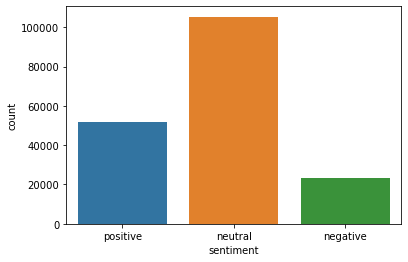

In [30]:
sns.countplot(data = df, x = 'sentiment')
plt.show()

### Top 5 companies based on overall tweet counts

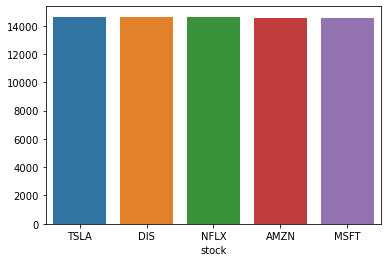

In [34]:
top5 = df.groupby(['stock'])['tweets'].count().sort_values(ascending= False).nlargest(5)
# display(top5)
sns.barplot(x = top5.index, y = top5.values)
plt.show()

top5_companies = top5.axes[0]

### Count of tweets per month for top 5 companies

In [35]:
top5_df = df[df['stock'].isin(top5_companies)]

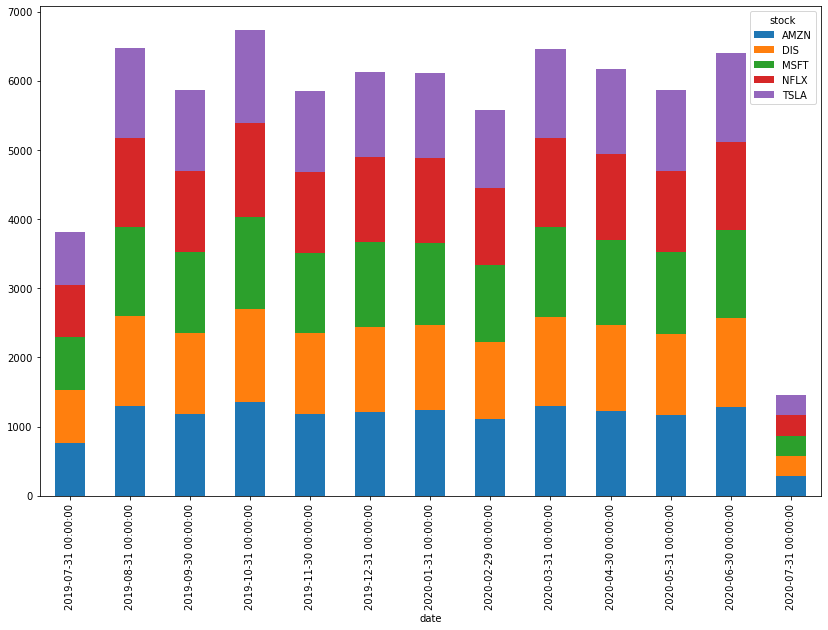

In [36]:
fig, axs = plt.subplots(1,1,figsize=(14,9))
top5_df.groupby([pd.Grouper(freq='M'), 'stock'])['tweets'].count().unstack().plot(kind = 'bar', stacked = True, ax=axs)
plt.show()

#### Length distribuition of tweets

In [37]:
df['tweet_length'] = df['tweets'].apply(lambda tweet: len(tweet.split()))
tweet_length_mean = np.mean(df['tweet_length'])
print('Mean length of tweets: ' + str(tweet_length_mean))
df.sample(5)

Mean length of tweets: 26.461576846307384


,stock,tweets,negative,neutral,positive,open,high,low,close,adj_close,volume,sentiment,tweet_length
date,,,,,,,,,,,,,
2020-03-03,AAPL,Hyper launches world's first USB-C and Lightni...,0.003431,0.383696,0.612873,303.670013,304.000000,285.799988,289.320007,288.538940,79868900,positive,14
2020-07-08,GOOGL,RUSSIA BOOGEY MAN = great for #JeffreyEpstein ...,0.151375,0.648807,0.199818,1500.800049,1511.170044,1492.300049,1503.599976,1503.599976,1588300,neutral,45
2019-12-18,GE,"$VERB THIS IS WHERE ""REAL"" MONEY IS MADE-BUYIN...",0.088186,0.733210,0.178605,11.020000,11.140000,10.920000,10.960000,10.922832,75428100,neutral,46
2020-01-28,TSLA,Maybe include sticker price for these aswell? ...,0.022806,0.692955,0.284239,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,neutral,19
2020-02-18,SBUX,http://www.xtralease.com \n http://www.atl-tr...,0.022595,0.879566,0.097840,89.370003,89.470001,88.290001,89.230003,88.728577,5288800,neutral,25


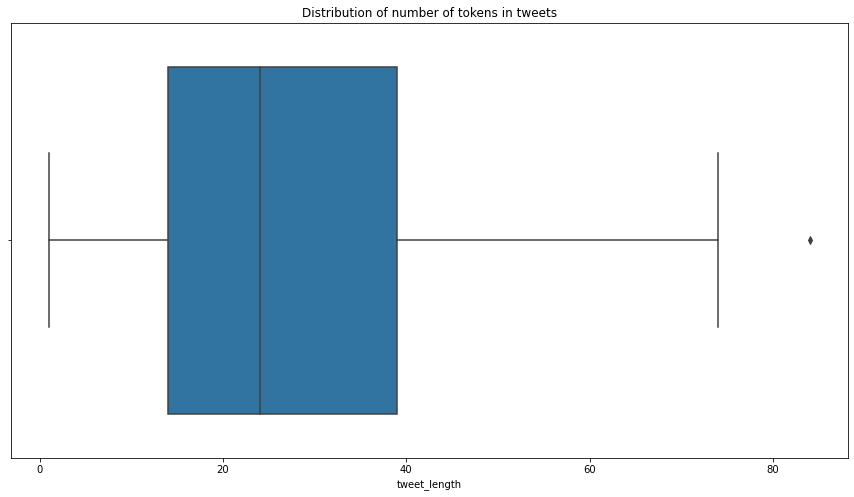

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.set_title('Distribution of number of tokens in tweets')
sns.boxplot(x = df['tweet_length'], ax=axes)
# sns.histplot(x = df['tweet_length'], bins=10, kde=True, ax=axes[1])
# axes[1].vlines(tweet_length_mean, 0, 5000, color = 'r')
# plt.annotate("mean", xy=(tweet_length_mean, 5000), xytext=(tweet_length_mean-2, 5050),
#             color='r')
plt.show()

#### Emoticons analysis

In [ ]:
# !pip install -U emoji

In [42]:
# emoticons
import emoji
import regex as re

target_emojis = {'positive': [],
                'neutral': [],
                'negative': []}

for _, row in tqdm(df.iterrows()):
    if(emoji.emoji_count(row['tweets']) >= 1):
        emoji_list = emoji.emoji_list(row['tweets'])
        emojis = [emoji_item['emoji'] for emoji_item in emoji_list]
        target_emojis[row['sentiment']].extend(emojis)

0it [00:00, ?it/s]

Top emojis for positive 
 ['🔥', '💰', '🚀', '📈', '▪️', '🤑', '😎', '💸', '😂', '🔼', '🤣', '✅', '➡️', '💵', '🥳', '💥', '👀', '💯', '👍', '🔽']


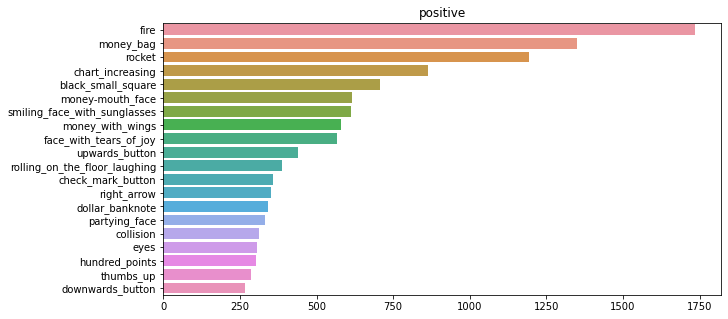

Top emojis for neutral 
 ['▶', '🇺🇸', '📈', '▪️', '⬆', '💸', '😂', '⬇', '🔥', '🤔', '🛒', '➡️', '🔽', '🚨', '📉', '🛑', '🥇', '🤣', '🔼', '👇']


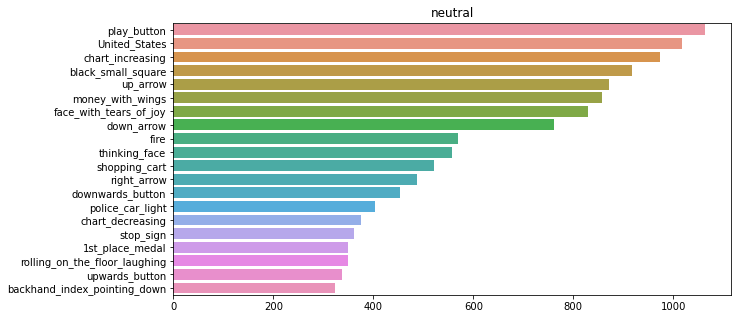

Top emojis for negative 
 ['😂', '🤣', '🤮', '🤢', '😭', '🤦\u200d♂️', '🤔', '🙄', '🚨', '💰', '📉', '🦠', '💩', '😳', '🤦🏻\u200d♂️', '😷', '😡', '👇', '💸', '😱']


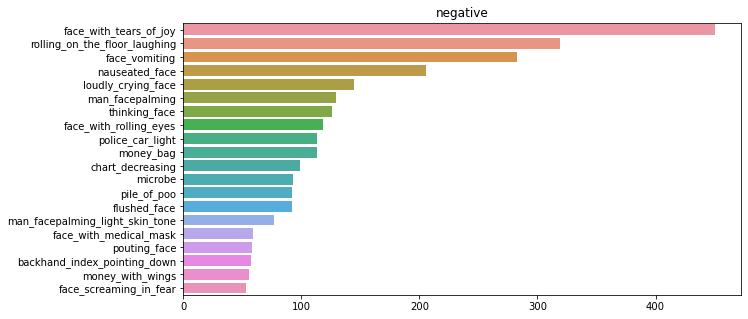

In [43]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

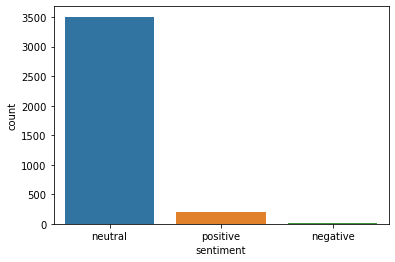

In [55]:
test_df = df.groupby(['date', 'stock'])[['positive', 'neutral', 'negative']].mean().reset_index()
test_df['sentiment'] = test_df[['negative', 'neutral', 'positive']].idxmax(axis = 1)
sns.countplot(data = test_df, x = 'sentiment')
plt.show()